In [217]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Project1_Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#!kaggle competitions download -c da218o-class-competition-predict-missing-data



Project1_Data/coordinates.csv
Project1_Data/Node_501.csv
Project1_Data/Node_502.csv
Project1_Data/Node_505.csv
Project1_Data/Node_507.csv
Project1_Data/Node_508.csv
Project1_Data/Node_locations.xlsx
Project1_Data/sample_submission.csv
Project1_Data/submission_file.csv


In [175]:
pd1 = pd.read_csv('Project1_Data/Node_501.csv', index_col=0)
pd1['lat'] = -37.8148084
pd1['lng'] = 144.980999

pd2 = pd.read_csv('Project1_Data/Node_502.csv', index_col=0)
pd2['lat'] = -37.8146097
pd2['lng'] = 144.9790177

pd3 = pd.read_csv('Project1_Data/Node_505.csv', index_col=0)
pd3['lat'] = -37.813073
pd3['lng'] = 144.9804061

pd4 = pd.read_csv('Project1_Data/Node_507.csv', index_col=0)
pd4['lat'] = -37.8149218
pd4['lng'] = 144.9822582

pd5 = pd.read_csv('Project1_Data/Node_508.csv', index_col=0)
pd5['lat'] = -37.8134078
pd5['lng'] = 144.9794923



In [209]:
# center coordinate of all 5 sensors
lat0 = -37.8141641 #average of all 5 latitutes
lng0 = 144.9804347 #average of all 5 longitutude

In [176]:
# spd = pd.concat([pd1, pd2,pd3,pd4,pd5], axis=0)
spd = pd.concat([pd2], axis=0)

In [212]:
spd['ts'] = spd.timestamp.apply(lambda x: pd.to_datetime(x.replace('/0014','/2014').replace('/0015','/2015'),format='%d/%m/%Y %H:%M'))
spd['ts_value'] = spd.ts.apply(lambda x: x.value/10**9)
spd['min'] = spd.ts.apply(lambda x: (x.hour)*60 + x.minute-1)
spd['date'] = spd.ts.apply(lambda x: x.day-1 + (x.month-1)*30 + (x.year-2014)*30*12)
spd.shape

(1254, 9)

In [213]:
tnan = (spd['temperature'].notna())
hnan = (spd['humidity'].notna())
#tnan.head()
#hnan.head()
spd_train = spd[tnan & hnan]
spd_test = spd[ (tnan & hnan)==False]

In [214]:
print(spd_train.shape)
spd_train.head()

(1154, 9)


,timestamp,temperature,humidity,lat,lng,ts,min,date,ts_value
ID,,,,,,,,,
1368,09/12/0014 00:01,23.54,30.63,-37.81461,144.979018,2014-12-09 00:01:00,0,338,1.418083e+09
1369,09/12/0014 00:11,23.54,31.11,-37.81461,144.979018,2014-12-09 00:11:00,10,338,1.418084e+09
1370,09/12/0014 00:21,23.54,30.63,-37.81461,144.979018,2014-12-09 00:21:00,20,338,1.418084e+09
1371,09/12/0014 00:32,23.54,30.79,-37.81461,144.979018,2014-12-09 00:32:00,31,338,1.418085e+09
1372,09/12/0014 00:42,22.90,30.63,-37.81461,144.979018,2014-12-09 00:42:00,41,338,1.418086e+09


In [215]:
print(spd_test.shape)
spd_test.head()

(100, 9)


,timestamp,temperature,humidity,lat,lng,ts,min,date,ts_value
ID,,,,,,,,,
1389,09/12/0014 03:36,22.25,NaN,-37.81461,144.979018,2014-12-09 03:36:00,215,338,1.418096e+09
1401,09/12/0014 05:40,NaN,32.37,-37.81461,144.979018,2014-12-09 05:40:00,339,338,1.418104e+09
1419,09/12/0014 08:44,NaN,31.11,-37.81461,144.979018,2014-12-09 08:44:00,523,338,1.418115e+09
1433,09/12/0014 11:08,23.22,NaN,-37.81461,144.979018,2014-12-09 11:08:00,667,338,1.418123e+09
1434,09/12/0014 11:18,22.90,NaN,-37.81461,144.979018,2014-12-09 11:18:00,677,338,1.418124e+09


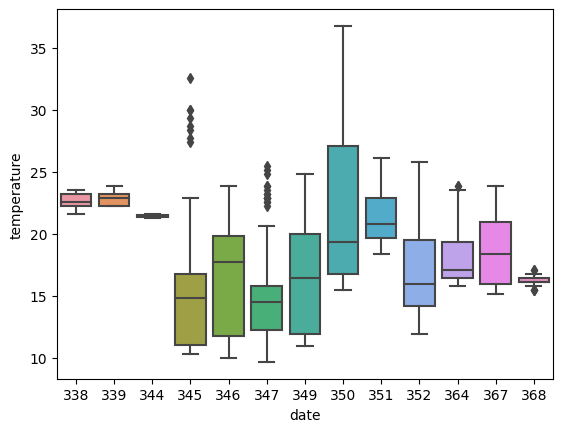

In [181]:
sns.boxplot(data=spd_train,x='date',y='temperature')
plt.show()

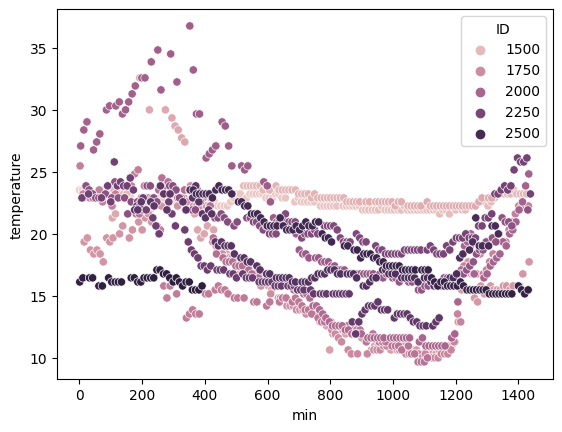

In [182]:
sns.scatterplot(data=spd_train,x='min',y='temperature', hue='ID')
plt.show()

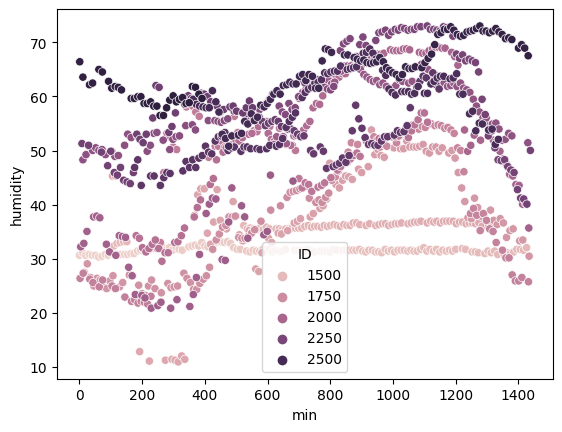

In [183]:
sns.scatterplot(data=spd_train,x='min',y='humidity', hue='ID')
plt.show()

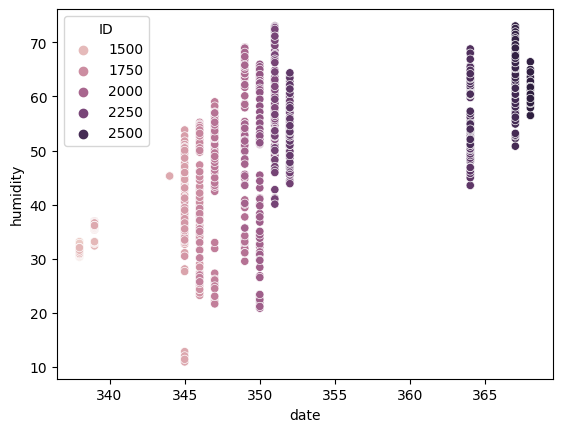

In [184]:
sns.scatterplot(data=spd_train,x='date',y='humidity', hue='ID')
plt.show()

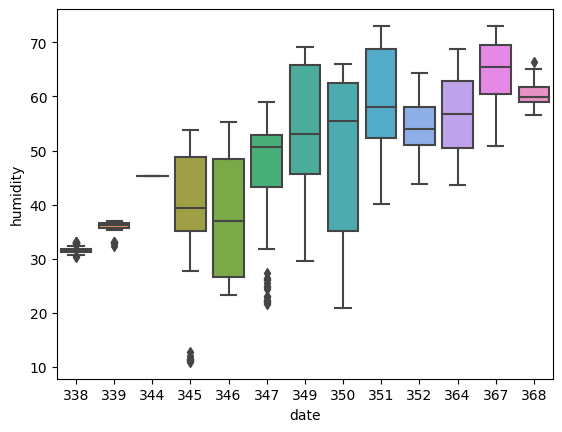

In [185]:
sns.boxplot(data=spd_train,x='date',y='humidity')
plt.show()

In [186]:
spd_train.describe()

,temperature,humidity,lat,lng,min,date
count,1154.000000,1154.000000,1.154000e+03,1154.000000,1154.000000,1154.000000
mean,18.825125,48.307251,-3.781461e+01,144.979018,740.372617,350.196707
std,4.555427,13.960354,7.108508e-15,0.000000,388.183791,8.921472
min,9.672000,10.920000,-3.781461e+01,144.979018,0.000000,338.000000
25%,15.800000,35.680000,-3.781461e+01,144.979018,418.250000,345.000000
50%,18.700000,50.660000,-3.781461e+01,144.979018,755.000000,349.000000
75%,22.580000,59.965250,-3.781461e+01,144.979018,1061.750000,352.000000
max,36.770000,73.047000,-3.781461e+01,144.979018,1438.000000,368.000000


In [216]:
spd_train.corr()

C:\Users\Archit Agarwal\AppData\Local\Temp\ipykernel_3580\2707083639.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spd_train.corr()


,temperature,humidity,lat,lng,min,date,ts_value
temperature,1.000000,-0.541868,NaN,NaN,-0.395639,-0.166074,-0.174191
humidity,-0.541868,1.000000,NaN,NaN,0.320201,0.656294,0.659944
lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lng,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.395639,0.320201,NaN,NaN,1.000000,-0.027855,0.002202
date,-0.166074,0.656294,NaN,NaN,-0.027855,1.000000,0.999330
ts_value,-0.174191,0.659944,NaN,NaN,0.002202,0.999330,1.000000


## Linear Regression
Trying out different ML approches (non-probabilistic)